In [1]:
%matplotlib inline
import sys
import scipy.optimize, scipy.special
from numpy import *
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

EX_DIRECTORY_PATH = './data/'

def plot( data ):
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    pyplot.xlim([25, 115])
    pyplot.ylim([25, 115])

    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=40, linewidths=1, label="Not admitted" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='b', marker='+', s=40, linewidths=2, label="Admitted" )
    pyplot.legend()
    
def plotBoundary( data, X, theta ):
    plot( data )
    plot_x = array( [min(X[:,1]), max(X[:,1])] )
    plot_y = (-1./ theta[2]) * (theta[1] * plot_x + theta[0])
    pyplot.plot( plot_x, plot_y )
    
def sigmoid( z ):
    return scipy.special.expit(z)
    # return 1.0 / (1.0 + exp( -z ))

def computeCost( theta, X, y ):
    m = shape( X )[0]
    hypo = sigmoid(X.dot( theta ))
    term1 = log( hypo ).T.dot( -y )
    term2 = log( 1.0 - hypo ).T.dot( 1-y )
    return ((term1 - term2) / m).flatten()

def gradientCost( theta, X, y ):
    m = shape(X)[0]
    return ( X.T.dot(sigmoid( X.dot( theta ) ) - y)  ) / m

def costFunction( theta, X, y ):
    cost      = computeCost( theta, X, y )
    gradient = gradientCost( theta, X, y )
    # m            = shape( X )[0]
    # hypo       = sigmoid( X.dot( theta ) )
    # term1      = log( hypo ).transpose().dot( -y )
    # term2      = log( 1.0 - hypo ).transpose().dot( 1 - y )
    # cost       = ((term1 - term2) / m)
    # gradient = (X.transpose().dot( hypo - y) ) / m
    return cost

def findMinTheta( theta, X, y ):
    result = scipy.optimize.fmin( costFunction, x0=theta, args=(X, y), maxiter=500, full_output=True )
    return result[0], result[1]

def predict( theta, X, binary=True ):
    prob = sigmoid( theta.dot( X ))
    if binary :
        return 1 if prob > 0.5 else 0
    else:
        return prob


def part1_1():
    data = genfromtxt( EX_DIRECTORY_PATH + "ex2data1.txt", delimiter = ',' )
    m, n = shape( data )[0], shape(data)[1] - 1
    X      = c_[ ones((m, 1)), data[:, :n] ]
    y      = data[:, n:n+1]
    
    plot( data )
    pyplot.show()
    
def part1_2():
    data  = genfromtxt( EX_DIRECTORY_PATH + "ex2data1.txt", delimiter = ',' )
    m, n  = shape( data )[0], shape(data)[1] - 1
    X       = c_[ ones((m, 1)), data[:, :n] ]
    y       = data[:, n:n+1]
    theta = zeros( (n+1, 1) ) 

    print (computeCost(theta, X, y))
    theta, cost = findMinTheta( theta, X, y )    
    
    print("Theta:",theta)
    print("Cost:",cost)
    
    plotBoundary( data, X, theta )
    pyplot.show()

    test = array([1, 45, 85])
    print (predict( test, theta ))

In [2]:
def main():
    set_printoptions(precision=6, linewidth=200)

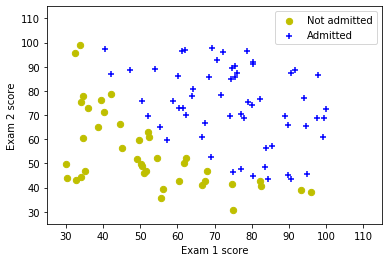

In [3]:
    part1_1()

[0.69314718]
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Theta: [-25.16130062   0.20623142   0.20147143]
Cost: 0.2034977015902151


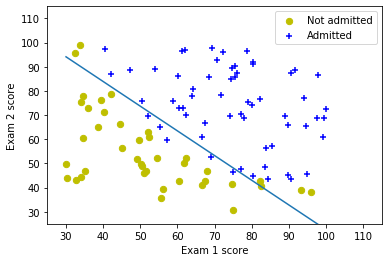

1


In [4]:
    part1_2()

In [5]:
if __name__ == '__main__':
    main()